## Make maps of converted GIS shapefiles using cartopy

In [1]:
import xarray as xr
import numpy as np
#import os
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import sys
#from matplotlib import path
#import shapefile
import geopandas as gpd
#from shapely.geometry import Polygon
#import pyproj
#from shapely.geometry import Point
#import matplotlib.path as mpltPath
#from shapely.geometry.multipolygon import MultiPolygon
sys.path.append('./subroutines/')
import pices
import matplotlib.patheffects as PathEffects
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.crs as ccrs
from cartopy.examples.arrows import sample_data



In [2]:
ds_pices360 = pices.get_pices_mask()
ds_lme = pices.get_lme_mask()


# Read in ERSST data

In [3]:
url = 'https://podaac-opendap.jpl.nasa.gov:443/opendap/allData/ersst/L4/ncei/v3b/monthly/netcdf/2016/ersst.201602.nc'
ds = xr.open_dataset(url)
ds = ds.isel(lev=0).isel(time=0)
ds.coords['lon'] = (ds.coords['lon'] + 180) % 360 - 180
ds = ds.sortby('lon').sortby('lat')


# Plot SST as background for all LMEs
- Use cartopy to put in coastlines

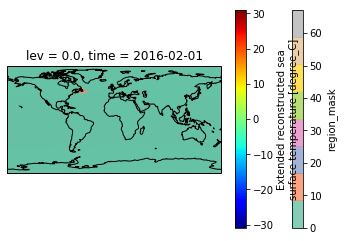

In [10]:
ax = plt.axes(projection=ccrs.PlateCarree())
ds_mask_lme.region_mask.plot(ax=ax,cmap='Set2',vmin=0,vmax=67,alpha=.8);
ds.sst.plot(ax=ax,zorder=-1,cmap='jet')
ax.coastlines()

In [ ]:
filename_out = data_dir+'LME_all_mask.nc'
ds_mask=xr.open_dataset(filename_out)
ds_mask.close()
ds_mask2 = ds_mask.where(ds_mask!=0,np.nan)
#import cartopy.crs as ccrs
#from cartopy.examples.arrows import sample_data
plt.figure(figsize=(13,6.2))
ax = plt.subplot(111, projection=ccrs.PlateCarree(central_longitude=180))#, 
#                                               min_latitude=-80, max_latitude=80))
ax.background_img(name='ne_shaded', resolution='low')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([1,-1,-80,80])
mm = ax.pcolormesh(ds_mask.lon,\
                   ds_mask.lat,\
                   ds_mask2.region_mask,vmin=11, vmax=24, transform=ccrs.PlateCarree(),cmap='jet' )
ax.coastlines(resolution='10m');
plt.title('LME regions')
plt.colorbar(mm,ax=ax,shrink=.7,pad=.01,label='LME region number')
plt.savefig(dir_figs+'/LME_all_regions_mask_be.png', dpi=100)


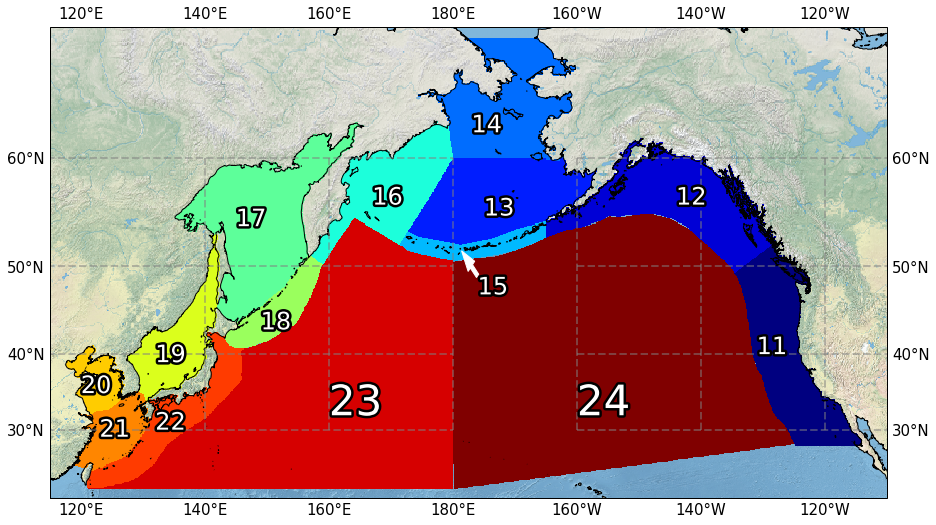

In [20]:
ds_mask_tem2 = ds_pices360.where(ds_pices360>0,np.nan)

proj = ccrs.PlateCarree()

plt.figure(figsize=(15,11))
ax = plt.subplot(111, projection=ccrs.Mercator(central_longitude=180, 
                                               min_latitude=20, max_latitude=69))
ax.background_img(name='natural-earth-1', resolution='large4096px')
#ax.background_img(name='BM', resolution='high')
ax.set_extent([115,-110,18,69])
mm = ax.pcolormesh(ds_mask_tem2.lon,\
                   ds_mask_tem2.lat,\
                   ds_mask_tem2.region_mask,vmin=11, vmax=24, transform=proj,cmap='jet' )

ptlat=[40,56,55,62,47,56,54,43,39,35,29,30]
ptlon=[-131,-144,-175,-177,-176,167,145,149,132,120,123,132]
ptlab=np.arange(11,23)
for (plat,plon,plab) in zip(ptlat,ptlon,ptlab):
    txt=ax.text(plon,plat,str(plab), color='white', fontsize=24, transform=proj)
    txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='k')])
ax.arrow(-176,49,-1,1, color='white', width=.5, transform=proj)
txt=ax.text(160,32,'23', color='white', fontsize=42, transform=proj)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='k')])
txt=ax.text(-160,32,'24', color='white', fontsize=42, transform=proj)
txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='k')])
ax.grid()
ax.coastlines(resolution='10m');
gl = ax.gridlines(crs=proj, draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator([-120,-140,-160,180,160,140,120])
gl.ylocator = mticker.FixedLocator([30,40,50,60])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.savefig('./figures/PICES_all_regions_mask_ne.png', dpi=100)


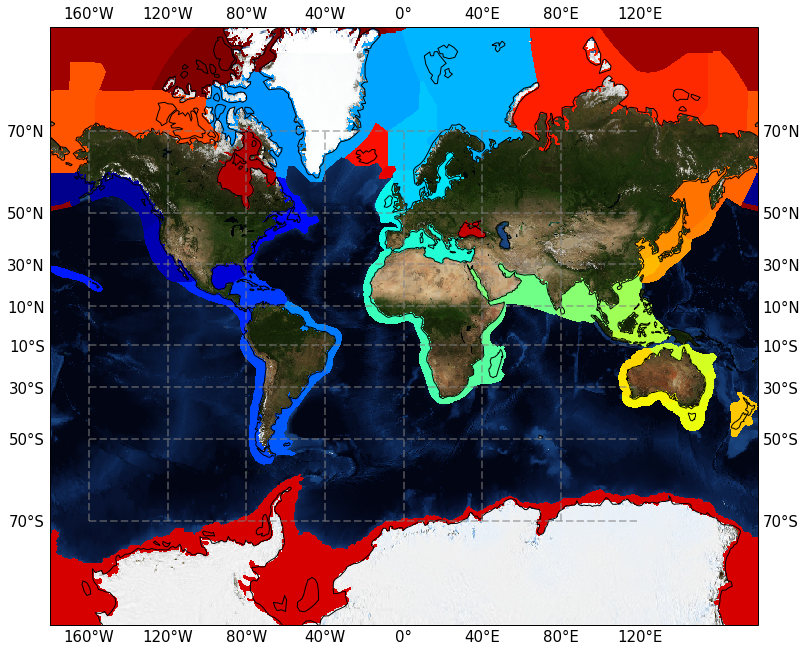

In [15]:
ds_lme2 = ds_lme.drop('LME_names')
ds_mask_tem2 = ds_lme2.where(ds_lme2>0,np.nan)

proj = ccrs.PlateCarree()

plt.figure(figsize=(15,11))
#ax = plt.subplot(111, projection=ccrs.Mercator(central_longitude=180, 
#                                               min_latitude=20, max_latitude=69))
ax = plt.subplot(111, projection=ccrs.Mercator(central_longitude=0, 
                                               min_latitude=-82, max_latitude=82))
#ax.background_img(name='natural-earth-1', resolution='large4096px')
ax.background_img(name='BM', resolution='high')
#ax.set_extent([115,-110,18,69])
mm = ax.pcolormesh(ds_mask_tem2.lon,\
                   ds_mask_tem2.lat,\
                   ds_mask_tem2.region_mask,vmin=0, vmax=66, transform=proj,cmap='jet' )

#ptlat=[40,56,55,62,47,56,54,43,39,35,29,30]
#ptlon=[-131,-144,-175,-177,-176,167,145,149,132,120,123,132]
#ptlab=np.arange(11,23)
#for (plat,plon,plab) in zip(ptlat,ptlon,ptlab):
#    txt=ax.text(plon,plat,str(plab), color='white', fontsize=24, transform=proj)
#    txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='k')])
##ax.arrow(-176,49,-1,1, color='white', width=.5, transform=proj)
##txt=ax.text(160,32,'23', color='white', fontsize=42, transform=proj)
#txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='k')])
#txt=ax.text(-160,32,'24', color='white', fontsize=42, transform=proj)
#txt.set_path_effects([PathEffects.withStroke(linewidth=5, foreground='k')])
ax.grid()
ax.coastlines();
gl = ax.gridlines(crs=proj, draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlocator = mticker.FixedLocator(np.arange(-160,160,40))
gl.ylocator = mticker.FixedLocator(np.arange(-70,71,20))
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}

plt.savefig('./figures/LME_all_regions_mask_be.png', dpi=100)


In [ ]:
tem = ds_lme2.where(ds_lme2==10,np.nan)
